In [49]:
import numpy as np

from loading_helper import load_data
from baseline_model import BaselineModel

import matplotlib.pyplot as plt

%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
one_khz = True

In [33]:
x_train, y_train = load_data(one_khz=one_khz)

x_train = x_train.view(x_train.shape[0], -1)

In [34]:
model = BaselineModel()

In [42]:
model.train(x_train, y_train)

array([[-1.56675499, -1.47684053, -1.29910781, ...,  0.68358975,
         0.71683471,  0.69547222],
       [ 2.30071039,  2.15648101,  1.96482253, ..., -0.72940687,
        -0.74104679, -0.72009657],
       [-0.14364559, -0.33798344, -0.51796496, ...,  0.04988215,
         0.0079829 , -0.02244404],
       ...,
       [ 0.72275516,  0.78617866,  0.82061307, ..., -0.06429939,
        -0.02932509, -0.03691816],
       [ 0.07756311, -0.17266548, -0.2099087 , ...,  0.18404546,
         0.12564655,  0.05571619],
       [ 0.28402451,  0.21675012,  0.06147433, ...,  2.76740286,
         2.69415821,  2.70447982]])

In [36]:
x_test, y_test = load_data(train=False, one_khz=one_khz)

x_test = x_test.view(x_test.shape[0], -1)

In [37]:
y_hat = model.predict(x_test)

print('Accuracy : {}%'.format(100*sum(y_hat == y_test)/len(y_test)))

Accuracy : 68.0%


### Test of the cross validation

In [36]:
model = BaselineModel()
model.cross_validation(x_train, y_train)

[[ 30.8  33.1  37.9 ...  32.9  33.8  32.8]
 [135.7 132.  126.9 ... -16.6 -17.  -16.1]
 [ 69.4  64.1  59.2 ...  10.7   9.1   8. ]
 ...
 [ 92.9  94.7  95.7 ...   6.7   7.8   7.5]
 [ 75.4  68.6  67.6 ...  15.4  13.2  10.7]
 [ 81.   79.2  75.  ... 105.9 102.7 102.2]]


(0.7031025985663083, 0.05466136349450192)

## Test of parameters tuning

With normalization :

In [51]:
model = BaselineModel()

params = dict(C=np.logspace(-5, 5, 15))

In [52]:
clf = model.tune_params(params, x_train, y_train)

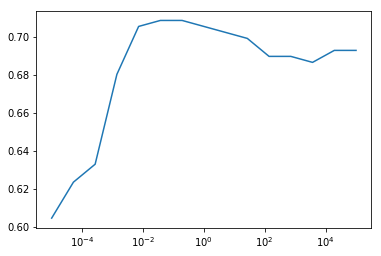

In [54]:
plt.semilogx(params['C'], clf.cv_results_['mean_test_score'])

In [64]:
model.set_params(C=1e-2)
model.train(x_train, y_train)
y_hat = model.predict(x_test)

print('Accuracy : {}%'.format(100*sum(y_hat == y_test)/len(y_test)))

Accuracy : 67.0%


Without normalization :

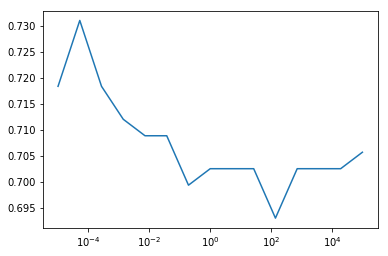

In [55]:
model = BaselineModel()

params = dict(C=np.logspace(-5, 5, 15))

clf = model.tune_params(params, x_train, y_train)

plt.semilogx(params['C'], clf.cv_results_['mean_test_score'])

In [63]:
model.set_params(C=1e0)
model.train(x_train, y_train)
y_hat = model.predict(x_test)

print('Accuracy : {}%'.format(100*sum(y_hat == y_test)/len(y_test)))

Accuracy : 73.0%
